In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Unindo os datasets
Unir as notas de bechdel com elenco e equipe com o merge:
- O primeiro parâmetro passado é dataframe da "esquerda" e o segundo, da direita. Os dois próximos parâmetros (`left_on` e `right_on`) dizem quais colunas serão consideradas pra fazer o merge. O `how='inner'` calcula a interseção entre essas duas colunas.

Primeiro é feito o merge do links_df com o bechdel_df, pois bechdel_df não possui o tmdbid diretamente, mas os outros sim.
obs.: o 'id' no `credits.csv` e no `movies_metadata.csv` é o tmdbid.

`reset_index(drop='True')` = reseta os indexes sem criar uma nova coluna para eles.

In [22]:
bechdel_df = pd.read_csv('datasets/Bechdel_detailed.csv')
links_df = pd.read_csv('datasets/movie-dataset/links.csv') # contém o id do imdb e tmdb de cada filme.
credits_df = pd.read_csv('datasets/movie-dataset/credits.csv')
imdb_df = pd.read_csv('datasets/movie-dataset/movies_metadata.csv')

# remove colunas não usadas.
bechdel_df = bechdel_df.drop(['Unnamed: 0', 'submitterid', 'date', 'visible', 'id'], axis=1)

# renomeia rating para não coincidir com o dos outros datasets.
bechdel_df = bechdel_df.rename(columns={'rating': 'bt_score'})

# junta os 3 dataframes e descarta colunas duplicadas.
bechdel_df = pd.merge(bechdel_df, links_df, left_on='imdbid', right_on='imdbId', how='inner').drop('imdbId', axis=1)
bechdel_df = pd.merge(bechdel_df, credits_df, left_on='tmdbId', right_on='id', how='inner').drop(['id', 'movieId'], axis=1)

# descarta itens sem cast e/ou crew. Reseta os index.
bechdel_df = bechdel_df[
	(bechdel_df.cast != '[]') & (bechdel_df.crew != '[]')
].reset_index(drop='True')

# UNINDO COM O MOVIES_METADATA.CSV

# transforma o dtype de todos os elementos da coluna 'id' em float pra poder fazer o merge. Alguns possuem strings que são então convertidas em NaN.
imdb_df['id'] = pd.to_numeric(imdb_df['id'], errors='coerce')

# remove colunas não usadas.
imdb_df = imdb_df.drop(['belongs_to_collection', 'homepage', 'original_title', 'overview', 'poster_path', 'release_date', 'spoken_languages', 'status', 'tagline', 'video', 'title'], axis=1)

# faz o df final.
bechdel_df = pd.merge(bechdel_df, imdb_df, left_on='tmdbId', right_on='id', how='inner').drop('id', axis=1)

bechdel_df.head()

C:\Users\Joao Victor Porto\AppData\Local\Temp\ipykernel_12656\4056419708.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_df = pd.read_csv('datasets/movie-dataset/movies_metadata.csv')


,title,year,bt_score,dubious,imdbid,tmdbId,cast,crew,adult,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,vote_average,vote_count
0,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,194079.0,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de...",False,0,"[{'id': 99, 'name': 'Documentary'}]",tt2221420,en,0.327841,"[{'name': 'Palo Alto Stock Farm', 'id': 84748}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,6.2,25.0
1,Accordion Player,1888.0,0.0,0.0,1758563.0,96882.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe49c39251416c750d2a8b', 'de...",False,0,"[{'id': 99, 'name': 'Documentary'}]",tt1758563,xx,0.212768,"[{'name': 'Whitley Partners', 'id': 48026}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,4.4,18.0
2,"Monkeyshines, No. 1",1890.0,0.0,0.0,361921.0,32571.0,"[{'cast_id': 10, 'character': 'Himself', 'cred...","[{'credit_id': '52fe44d99251416c9101ef9f', 'de...",False,0,"[{'id': 35, 'name': 'Comedy'}]",tt0361921,en,1.163672,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,4.3,15.0
3,"Monkeyshines, No. 2",1890.0,0.0,0.0,416046.0,33315.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe450c9251416c91025b0b', 'de...",False,0,[],tt0416046,xx,0.399258,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,4.5,12.0
4,"Monkeyshines, No. 3",1890.0,0.0,0.0,416047.0,33317.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe450c9251416c91025b2f', 'de...",False,0,[],tt0416047,xx,0.276161,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,3.3,5.0


In [23]:
bechdel_df.sort_values(by=['bt_score', 'year'], ascending=[False, True])

,title,year,bt_score,dubious,imdbid,tmdbId,cast,crew,adult,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,vote_average,vote_count
24,Cinderella,1899.0,3.0,0.0,230.0,114108.0,"[{'cast_id': 3, 'character': ""Le gnome de la p...","[{'credit_id': '52fe4b45c3a36847f81fb5cb', 'de...",False,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",tt0000230,fr,1.301063,"[{'name': 'Star-Film', 'id': 7159}, {'name': '...","[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,5.0,5.5,19.0
46,Gretchen the Greenhorn,1916.0,3.0,0.0,6745.0,126925.0,"[{'cast_id': 4, 'character': 'Gretchen Van Hou...","[{'credit_id': '52fe4aeac3a368484e16d9cd', 'de...",False,0,[],tt0006745,en,0.153125,[],[],0.0,58.0,5.5,2.0
49,"Poor Little Rich Girl, The",1917.0,3.0,0.0,8443.0,95866.0,"[{'cast_id': 2, 'character': 'Gwen', 'credit_i...","[{'credit_id': '5429dcd90e0a260a2d0007d5', 'de...",False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0008443,en,0.90043,"[{'name': 'Artcraft Pictures Corporation', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,78.0,4.5,10.0
50,Stella Maris,1918.0,3.0,0.0,9652.0,70753.0,"[{'cast_id': 1, 'character': 'Miss Stella Mari...","[{'credit_id': '52fe4810c3a368484e0e7817', 'de...",False,0,"[{'id': 18, 'name': 'Drama'}]",tt0009652,en,0.310636,"[{'name': 'Pickford Film', 'id': 38097}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,84.0,7.6,7.0
51,Ich mochte kein Mann sein,1918.0,3.0,1.0,10281.0,48263.0,"[{'cast_id': 4, 'character': 'Ossi', 'credit_i...","[{'credit_id': '52fe475cc3a36847f8131857', 'de...",False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0010281,de,0.999418,"[{'name': 'Projektions-AG Union (PAGU)', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",0.0,45.0,6.9,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7566,"Wall, The",2017.0,0.0,0.0,4218696.0,405775.0,"[{'cast_id': 1, 'character': 'Isaac', 'credit_...","[{'credit_id': '57827c1cc3a36860a9000001', 'de...",False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",tt4218696,en,15.5975,"[{'name': 'Big Indie Pictures', 'id': 6831}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1803009.0,89.0,6.1,117.0
7575,Sand Castle,2017.0,0.0,0.0,2582576.0,390054.0,"[{'cast_id': 3, 'character': 'Matt Ocre', 'cre...","[{'credit_id': '56f86a659251414c1d000c58', 'de...",False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt2582576,en,7.823933,"[{'name': 'The Mark Gordon Company', 'id': 155...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,113.0,6.3,137.0
7595,Diary of a Wimpy Kid: The Long Haul,2017.0,0.0,0.0,6003368.0,417830.0,"[{'cast_id': 39, 'character': 'Greg Heffley', ...","[{'credit_id': '57e6f624c3a368220e009c0c', 'de...",False,22000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",tt6003368,en,28.176992,"[{'name': 'Twentieth Century Fox', 'id': 7392}]","[{'iso_3166_1': 'US', 'name': 'United States o...",40120144.0,91.0,6.1,48.0
7596,God&#39;s Own Country,2017.0,0.0,0.0,5635086.0,428493.0,"[{'cast_id': 8, 'character': 'Johnny Saxby', '...","[{'credit_id': '58655a069251412b8701fb9a', 'de...",False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",tt5635086,en,2.595488,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,105.0,5.4,8.0


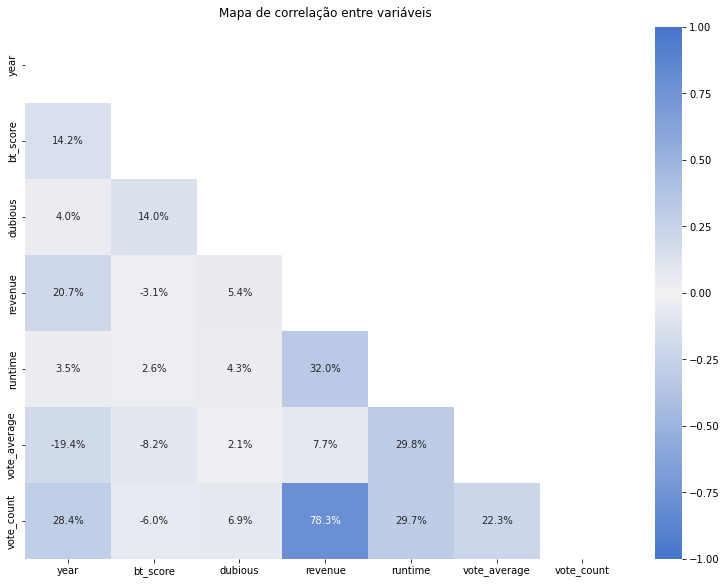

In [25]:
fig, axs = plt.subplots(figsize=(10, 8), constrained_layout=True)


def plot(axs, data, title):
    corr = data.corr(method='spearman')
    cmap = sns.diverging_palette(255, 255, sep=1, as_cmap=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    graph = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.1%', cmap=cmap, mask=mask, ax=axs)
    graph.set_title(title, pad=10)


plot(axs, bechdel_df.drop(['imdbid', 'tmdbId', 'imdb_id'], axis=1), 'Mapa de correlação entre variáveis')
plt.show()